# Исследование надёжности заёмщиков

**Описание проекта**  
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.    
  
**Цель исследования**
1. Определить есть ли зависимость между наличием детей и возвратом кредита в срок.
2. Выяснить есть ли зависимость между семейным положением и возвратом кредита в срок.
3. Понять есть ли зависимость между уровнем дохода и возвратом кредита в срок.
4. Выявить как разные цели кредита влияют на его возврат в срок.
5. Выявить как возраст клиента влияет на возврат кредита в срок.
6. Определить есть ли зависимость между типом занятости клиента и возврат кредита в срок.
7. Выяснить каким образом уровень образования влияет на возврат кредита.
8. Понять есть ли влияние пола клиента на возврат кредита в срок.

**Ход исследования**  
Данные о поведении пользователей получаем из файла `/datasets/data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез нам требуется выполнить обзор данных и их предобработку.  

Предобработку данных выполним по следующему сценарию:  
1. Определим и заполним пропущенные значения:  
опишем пропущенные значения;  
приведем возможные причины появления пропусков в данных;  
объясним, по какому принципу заполнены пропуски.
2. Заменим вещественный тип данных на целочисленный:  
поясним, как выбираем метод для изменения типа данных.  
3. Удалим дубликаты:  
поясним, как выбираем метод для поиска и удаления дубликатов в данных;  
приведем возможные причины появления дубликатов.  
4. Выделим леммы в значениях столбца с целями получения кредита:  
опишем, как проводим лемматизацию целей кредита.  
5. Категоризируем данные:  
перечислим и объясним выбраныне категории данных. 

Таким образом, исследование проведем в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Ответы на вопросы цели исследования.
 4. Вывод.

Поскольку работаю через google clab, требуется выполнять ряд функций

In [1]:
from google.colab import drive # подключяем либу гугл драйва, для загрузки с гугл диска
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Google colab никак не дружит с pymystem3, поэтому ребята с githab (https://github.com/nlpub/pymystem3/issues/28) предложили вот такое решение:

In [2]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2021-12-01 11:15:18--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.243, 5.45.205.241, 5.45.205.245, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.243|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2021-12-01 11:15:18--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.9’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

## Обзор данных

Импортируем библиотеки необходимые для проведения исследования

In [3]:
import pandas as pd # подключим библиотеку pandas
from pymystem3 import Mystem # выполним импорт Mystem из библиотеки pymystem3. MyStem производит морфологический анализ текста на русском языке
m = Mystem() # упростим вызов функции mystem, определив ее в переменную m
from collections import Counter # вызовем контейнер Counter из модуля collections
import seaborn as sns # подключим библиотеку seaborn
import matplotlib.pyplot as plt # подключим библиотеку matplotlib

Прочитаем файл `data.csv` из папки `/datasets` и сохраним его в переменной `data`:

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Yandex_DS/project_2_borrower_beliability_research/data.csv') # прочитаем файл с данными по исселедованию

Выведем информацию о датасете:

In [5]:
data.info() # вызовем метод для просмотра сводной информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Мы видим, что имеются пропущенные значения в столбцах `days_employed` и  `total_income`. Тип данных в таблице int, float, object.

Посмотрим первые 10 строк:

In [6]:
data.head(10) # метод .head() для просмотра верхней части таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Описание наименования столбцов
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

При анализе первых 10 строк уже видны странные значения в столбцах:
- `days_employed` - трудовой стаж не может быть отрицательный или слишком большой, и при этом тип данных должен быть целочисленный.
- `education` - текст имеет прописные и строчные буквы, нужно привести к одному виду;
- `total_income` - ежемесячный доход должен иметь тип даных целочисленный.

Посмотрим, что содержат в себе каждый столбец для более подброного обзора данных:

Посмотрим уникальные значения столбца `children` и их количество:

In [7]:
data['children'].value_counts() # просмотр уникальных значений столбца и их количества

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Видно, что количество детей "-1" быть не может, в тоже время 20 детей у 76 семей очень маловероятное.

Посмотрим уникальные значения столбца `dob_years` и их количество:

In [8]:
data['dob_years'].value_counts() # просмотр уникальных значений столбца и их количества

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

В столбце присутствуют ячейки со значениями "0" лет, что является неправильным.

Посмотрим уникальные значения столбца `education` и их количество:

In [9]:
data['education'].value_counts() # просмотр уникальных значений столбца и их количества

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Значения в столбце имеют прописные и строчные буквы, далее приведем столбец к строчным буквам.

Посмотрим уникальные значения столбца `education_id` и их количество:

In [10]:
data['education_id'].value_counts() # просмотр уникальных значений столбца и их количества

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Явных артефактов не замечено.

Посмотрим уникальные значения столбца `family_status` и их количество:

In [11]:
data['family_status'].value_counts() # просмотр уникальных значений столбца и их количества

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

ячейки для "Не женатых" требуется привести к строчным буквам.

Посмотрим уникальные значения столбца `family_status_id` и их количество:

In [12]:
data['family_status_id'].value_counts() # просмотр уникальных значений столбца и их количества

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

Явных артефактов не замечено.

Посмотрим уникальные значения столбца `gender` и их количество:

In [13]:
data['gender'].value_counts() # просмотр уникальных значений столбца и их количества

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

По-скольку столбец `gender` в нашем датасете это пол, то XNA - явно артефакт в данных.

Посмотрим уникальные значения столбца `income_type` и их количество:

In [14]:
data['income_type'].value_counts() # просмотр уникальных значений столбца и их количества

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

Явных артефактов не замечено. Хотя вопрос возникает, каким образов безработный, студент, в декрете получили кредит.

Посмотрим уникальные значения столбца `debt` и их количество:

In [15]:
data['debt'].value_counts() # просмотр уникальных значений столбца и их количества

0    19784
1     1741
Name: debt, dtype: int64

Явных артефактов не замечено.

Посмотрим уникальные значения столбца `total_income` и их количество:

In [16]:
data['total_income'].value_counts() # просмотр уникальных значений столбца и их количества

112874.418757    1
133912.272223    1
182036.676828    1
122421.963500    1
198271.837248    1
                ..
133299.194693    1
115080.782380    1
84896.781597     1
153838.839212    1
150014.128510    1
Name: total_income, Length: 19351, dtype: int64

Посмотрим минимальный и максимальный доходы, к сожалению данных о валюте у нас нет, результаты выводем числом:

In [17]:
f"Максимальный доход: {data['total_income'].max()}"

'Максимальный доход: 2265604.028722744'

In [18]:
f"Минимальный доход: {data['total_income'].min()}"

'Минимальный доход: 20667.26379327158'

Явных артефактов не замечено. При этом нужно привести к типу int64.

Посмотрим уникальные значения столбца `purpose` и их количество:

In [19]:
data['purpose'].value_counts() # просмотр уникальных значений столбца и их количества

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Явных артефактов не замечено. Требуется провести категоризацию данных, даже при первом приблежении видно, что "Свадьба", "Сыграть свадьбу", одни и теже цели кредита.

**Вывод**  

В колонках видны нарушения:
1. Строчные буквы сочетаются с прописными (столбцы: `'education'` образование, `'family_status'` семейное положение).
2. Встречаются отрицательные значения, которых быть не может (столбцы: `'days_employed'` стаж, `'children'` количество детей).
3. В столбце с `'gender'` полом имеется артефакт.
4. Имеются несоотвествия значений ячеек и типа данных (столбцы: `'days_employed'` стаж и `'total_income'` доход должны быть целочисленные).
5. Некорректные значения в столбце со стажем `'days_employed'`, имеются значения слишком большие по числу.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Предобработка данных

### Обработка пропусков

Рассчитаем количество пропущенных значениях в колонках:

In [20]:
data.isna().sum()  # применяем метод isna() для определения пропущенных значений и используя метод sum() найдем их общее количество

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Мы видим, что столбцы `'days_employed'` и `'total_income'` имеют 2174 пропущенных значений.

Посмотрим на пропущенные значения:

In [21]:
data[data['days_employed'].isna()].head(10) # применим логическую индексацию использую сокращенную запись, для получения элементов по условию найти пропущенные значения в столбце 'days_employed' и выведем первые 10 стро

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Убедимся, что пропущенные значения в `'days_employed'` и `'total_income'` находятся в одних и техже строках:

In [22]:
days_employed_miss = data['days_employed'][data['days_employed'].isna()] # находим пропущенные значения в столбце 'days_employed'
total_income_miss = data['total_income'][data['total_income'].isna()] # находим пропущенные значения в столбце 'total_income'

differences_employed_income = days_employed_miss.append(total_income_miss).drop_duplicates(keep=False) # соеденим два столбца и удалим дубликаты, если столбцы идентичны, то удалиться все
differences_employed_income # выведем на экран

Series([], dtype: float64)

Пропущенные значения в столбцах `'days_employed'` и `'total_income'` находятся на одних строках. Можем предположить, что клиенты не указали доход, либо стаж. В тоже время возможен технических сбой при выгрузки данных.

Посмотрим уникальные записи в столбце `'income_type'` в которых пропущенные значения:

In [23]:
data[data['days_employed'].isna()]['income_type'].unique()

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

Значения выведены без аномалий. Если предположим, были бы только госслужащие, можно было бы выдвинуть гипотезу, что им нельзя указывать уровень дохода и стаж, но сокрее всего в столбцах `'days_employed'` и `'total_income'` пропущены значения из-за технической ошибки или человеческого фактора.

Заполним пропуски в столбце с доходами, правильно их заполнить медианными значениями дохода клиента.
Для этого, мы расчитаем медианный доход клиентов по столбцу `'total_income'`:

In [24]:
total_income_median = data['total_income'].median() # применим метод для расчета медианного значения

Заполним пропущенные значения в столбце `'total_income'` значениями медианного дохода:

In [25]:
data['total_income'] = data['total_income'].fillna(total_income_median) # используем метод для заполнения пропущенных значений в столбце 'total_income', и перезапишем его

Со значениями в трудовом стаже сложнее. Мы имеем артефакты в данных, некоторое количество клиентов имеет отрицательный стаж, некоторое имеет стаж со слишком большим значеним для человеской продолжительности работы (более 100 лет).

Выведем на экран таблица в которой значения в столбце `'days_employed'` меньше нуля (отрицательные):

In [26]:
days_employed_neg = data[data['days_employed'] < 0] # применим логическую индексацию по столбцу `'days_employed'` для нахождения всех отрицательных значений
days_employed_neg.sort_values(by = 'days_employed', ascending=True).head() # вывыдем на экран все отрицательные значения в порядке возрастания

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
4299,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
7329,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
17838,0,-16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
16825,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости


Выведем количество клиентов у которых стаж работы менее 1 года:

In [27]:
data[(data['days_employed'] < 0) & (data['days_employed'] > -365)]['days_employed'].count() # используем логическую индексацию и метод для подсчета количества строк

1827

Выведем уникальные строки для клиентов у которых отрицательный стаж работы:



In [28]:
days_employed_neg['income_type'].unique() # используем метод для нахждения уникальных значений в колонке 'income_type'

array(['сотрудник', 'компаньон', 'госслужащий', 'студент',
       'предприниматель', 'в декрете'], dtype=object)

Значения в столбце `'income_type'` - типы занятности, явным образом закономерностей не наблюдается.  
Можно предположить, что была техническая ошибка.

Выведем на экран таблица в которой значения в столбце `'days_employed'`, больше нуля:

In [29]:
days_employed_positive = data[data['days_employed'] > 0] # применим логическую индексацию по столбцу `'days_employed'` для нахождения всех значений больше нуля
days_employed_positive.sort_values(by = 'days_employed', ascending=True).head() # вывыдем на экран все положительные значения в порядке возрастания

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,среднее,1,вдовец / вдова,2,F,пенсионер,0,96519.339647,покупка жилья для семьи
9328,2,328734.923996,41,высшее,0,женат / замужем,0,M,пенсионер,0,126997.497760,операции со своей недвижимостью
17782,0,328771.341387,56,среднее,1,женат / замужем,0,F,пенсионер,0,68648.047062,операции с коммерческой недвижимостью
14783,0,328795.726728,62,высшее,0,женат / замужем,0,F,пенсионер,0,79940.196752,на покупку своего автомобиля
7229,1,328827.345667,32,среднее,1,гражданский брак,1,F,пенсионер,0,122162.965695,сыграть свадьбу


Положительные значения в столбце `'days_employed'` начаниются от 900 лет стажа, что явно не может быть правдой, значит это ошибочные данные.

Посмотрим уникальные значения для типа занятости для клиентов у которых стах больше "0":

In [30]:
days_employed_positive['income_type'].unique() # используем метод для нахждения уникальных значений в колонке 'income_type'

array(['пенсионер', 'безработный'], dtype=object)

Значения типа занятости для стажа в столбце `'days_employed'`, которые больше нуля, и при этом больше 900 лет, имееют  категории: пенсионер и безработный.

#### **Вывод**

В столбцах `'days_employed'` и `'total_income'` имелось 2174 пропущенных значений.

* Значения в `'total_income'`  заполнили медианными доходами клиентов.  
* Значения в столбце `'days_employed'` имееют артефакты, причем если рассматривать отрицательные значения, можно было бы предположить, что при расчете стажа перепутали даты и воспользоваться abs(), при этом 1827 клиентов имеют стаж менее 1 года, что может быть вызвано не оффициальным заработком. Значения в стаже более 900 лет, имеются у категорий пенсионер и безработный. При этом все данные в столбце имееют тип вещественный `float64`, а должны иметь целочисленный `int64` 
* Для ответов на вопросы настоящего исселедования значения в столбеце `'days_employed'` не требуются, а также их явная некорректность, и в тоже время невозможность определить причины появления артефактов, данный столбец мы удалим из нашей общей таблицы.

Удалим столбец `'days_employed'`, а также столбцы `'family_status_id'` и `'education_id'`, ввиду того, что они требуется для нашего исследования:

In [31]:
data = data.drop('days_employed', 1) # применим метод для удаления столбца 'days_employed'
data = data.drop('education_id', 1) # применим метод для удаления столбца 'education_id'
data = data.drop('family_status_id', 1) # применим метод для удаления столбца 'family_status_id'

### Замена типа данных

Заменем тип данных в столбце `'total_income'` с вещественного на целочисленный:

In [32]:
data['total_income'] = data['total_income'].astype('int') # переводем значения столбца 'total_income' в целочисленный тип, и перезапишем столбец

#### **Вывод**

Провели замену вещественного типа данных значений в столбце `'total_income'`, на целочисленный.  
Причина: доход указывают, как правило целым числом, либо с окргулением до сотых, а у нас чисел после запятой больше 2, что наводит на недоверии в данным в доходе.

### Обработка дубликатов

Приведем к нижнему регистру значение в столбцах образованием `'education'` и семейное положение `'family_status'`:

In [33]:
data['education'] = data['education'].str.lower() # приводим значение в столбце к нижнему регистру

In [34]:
data['family_status'] = data['family_status'].str.lower() # приводим значение в столбце к нижнему регистру

Также в данных присутсвуют неявные пропуски в столбце `'children'` , в которых имеются строки со значением "-1" и "20", что может сведетельствовать о случайном характере ошибки.  
Приведем значение "-1" к "1", а значение "20" к "2", т.к. вероятнее всего были ошибки с добавилением знака "-" и цифры "0":

In [35]:
data['children'] = data['children'].abs() # используем функцию abs для приведения всех отрицательных значений в положительное

In [36]:
data.loc[data['children'] == 20, 'children'] = 2 # проведем логическую индекцию для замены количество детей с "20" на "2"

В тоже время есть странное значение `"XNA"` в количетве 1 шт.  в столбце `'gender'`.  
Исправим его, примем, что `"XNA"` техническая ошибка и заменим на `"М"`:

In [37]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'M' # проведем логическую индекцию для замены количество детей с "XNA" на "M"

В столбце `'dob_years'` имеется записи с возрастом клиента "0".  

Посмотрим каким все уникальные значения в данном столбце и выведем их на экран в порядке возрастания. Результат выведем в строку, так как так удобнее прочитать данные:

In [38]:
''.join(str(sorted(data['dob_years'].unique()))) # в столбеце 'dob_years' выбираем уникальные значения, их сортируем в порядке возрастание и выводи в строку

'[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]'

В столбце `'dob_years'` значения годов идут по поярдку от 19 до 75. При этом можно было бы предположить что значение "0" это пропуск какого-нибудь десятичного числа 20, 30, 40 и т.д., но это не факт, хотя при этом они все присутствуют.  
Принимает решение заменить ячейки со значение "0" в столбце `'dob_years'` на медианный возраст:

In [39]:
dob_years_median = int(data['dob_years'].median()) # находим медиану в столбце dob_years'

In [40]:
data.loc[data['dob_years'] == 0, 'dob_years'] = dob_years_median # используем логическую индексацию для перезаписи значений "0" на медианное значение возраста

Проверим количество дубликатов:

In [41]:
data.duplicated().sum() # применяем метод определение дубликатов и суммируем их количество

72

Проведем удаление дубликатов:

In [42]:
data = data.drop_duplicates().reset_index(drop= True) # перезапишем нашу таблицу с данными с удалением дубликатов и сборосом индексов

#### **Вывод**

Для определения количества дубликатов мы привели столбцы `'education'` и `'family_status'` к нижнему регистру.  
Заменили непонятные значения в столбцах `'children'`, `'gender'`, `'dob_years'`.  
Провели удаление дубликатов с перезаписью нашего датасета для дальнейшей работы.

### Лемматизация

При анализе таблицы с данными выделить леммы для дальнешей категоризации требуется в столбце `'purpose'`, т.к. в нем имеется множество повторяющихся значений одинаковых категория кредитов.

Посмотрим уникальные значения столбца `'purpose'`:

In [43]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Посмотрим количество упоминаний лемматизированных слов.  
Для этого, переведем столбец `'purpose'` в строку:

In [44]:
string = ''.join(str(data['purpose'].unique())) # определим переменну string, в которую запижем в строке все уникальные значения ячеек из столбца 'purpose'

Вызовем контейнер для подсчета количества лемм:

In [45]:
lemmas = m.lemmatize(string) # вызовем функцию Mystem для строки со значениями из 'purpose'
Counter(lemmas) # подсчитаем число упоминаний

Counter({' ': 59,
         " '": 14,
         "'\n": 14,
         "' '": 23,
         "']\n": 1,
         "['": 1,
         'автомобиль': 9,
         'высокий': 3,
         'для': 2,
         'дополнительный': 2,
         'жилой': 2,
         'жилье': 7,
         'заниматься': 2,
         'коммерческий': 2,
         'на': 4,
         'недвижимость': 10,
         'образование': 9,
         'операция': 4,
         'подержать': 2,
         'покупка': 10,
         'получение': 3,
         'приобретение': 1,
         'проведение': 1,
         'профильный': 1,
         'ремонт': 1,
         'с': 5,
         'свадьба': 3,
         'свой': 4,
         'сдача': 1,
         'сделка': 2,
         'семья': 1,
         'со': 1,
         'собственный': 1,
         'строительство': 3,
         'сыграть': 1})

Исходя из подсчета лемм, можно сделать вывод, что наиболее популярные категории кредитов: 
* связанные с недвижмостью, образованием, автомобилем, свадьбой и прочие кредиты. Данные категории помогут нам в дальнешем для ответов на вопросы исследования.

Создим столбец с леммами.  
Для этого определим функцию, которая будет выделять леммы:

In [46]:
def lemma(purpose): # определим функцию lemma с аргументов purpose
  word = m.lemmatize(purpose) # получаем леммы из purpose
  return word # возвращаем значение лемм

Создадим в нашей таблице с данными новый столбец `'lemma'` и добавим в него леммы из столбца `'purpose'`:

In [47]:
data['lemma'] = data['purpose'].apply(lemma)

#### **Вывод**

В ходе лемматизации определили, что явным образом нужно выделить леммы столбца `'purpose'`.  
Выявлено, что наиболее частые категории кредитов это: недвижемость, жилье, автомобиль, образование, свадьба и прочие, данные категории помогут нам в дальнейшей исследовании.  
Создали столбец с леммами `'lemma'` из столбца `'purpose'`

### Категоризация данных

#### Столбец `'purpose'`

Рассмотрим столбец `'purpose'`, после выделения лемм, мы определили, что основные категории получения кредитов это: жилищный кредит, автокредит, кредит на образование, кредит на сваодьбу, предположим, что имеется категория для прочих кредитов.  
Определим функцию для определения категория из знчений ячеек в столбце `'purpose'`:

In [48]:
def purpose_group(purpose): # определим функцию purpose_group
# используем условия для возврата наименование категории кредита взависимости от определенных лемм
    if (('недвижимость' in purpose) or ('жилье' in purpose)): 
        return 'жилищный кредит'
    if 'автомобиль' in purpose:
        return 'автокредит'
    if 'образование' in purpose:
        return 'кредит на образование '
    if 'свадьба' in purpose:
        return 'кредит на свадьбу'        
    return 'прочий кредит' 

Создадим новый столбец `'purpose_group'` в который положим через функцию `purpose_group` категории кредитов исодя из столбца лемм:

In [49]:
data['purpose_group'] = data['lemma'].apply(purpose_group) # создаем новый столбец с категориями

Посмотрим уникальные значения в столбце `'purpose_group'`:

In [50]:
data['purpose_group'].value_counts() # определяем уникальные значения

жилищный кредит           10811
автокредит                 4306
кредит на образование      4013
кредит на свадьбу          2323
Name: purpose_group, dtype: int64

Видим что, категории "прочий кредит" не имеется в столбце, значит в нашем датасете клиенты брали кредиты только на 4 основные категории.

#### Столбец `'children'`

Определим функцю для категоризации столбца `'children'` и запишем новый столбец `'children_group'`:

In [51]:
def children_group(children): # определим функцию children_group
# используем оператор условия для разделение клиентов по количеству детей
    if children == 0 :
        return 'без детей'
    if children == 1:
        return 'один ребенок'       
    return 'многодетные' 

In [52]:
data['children_group'] = data['children'].apply(children_group) # создадим новый столбец в датасете

Посмотрим уникальные значене в новом столбце `'children_group'`:

In [53]:
data['children_group'].value_counts() # вывод количества уникальных значений

без детей       14090
один ребенок     4855
многодетные      2508
Name: children_group, dtype: int64

#### Столбец `'total_income'`

Следующим этапом создадим категории взависимости от уровня дохода, столбец `'total_income'`.  
Для определение деления по категориям уровня дохода построим график распределения, при этом верхнее значении возьмем 500000, поскольку мы определяли, что максимальных доход 2265604 и так удобнее читать:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Уровень дохода')

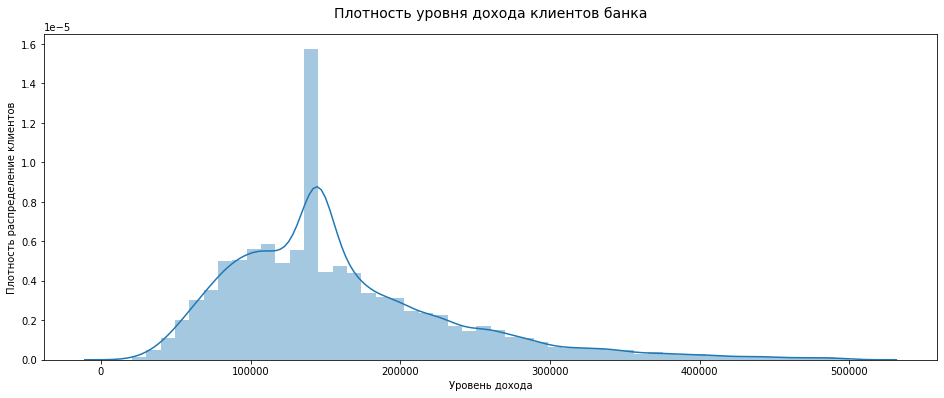

In [54]:
plt.figure(figsize=(16, 6)) # зададим размер графика
displot_income = sns.distplot(data.loc[data['total_income'] < 500000, 'total_income']) # определим какие данные мы читаем для построения графика
displot_income.set_title('Плотность уровня дохода клиентов банка', fontdict={'fontsize':14}, pad=16) # напишем заголовок графика
displot_income.set_ylabel('Плотность распределение клиентов') # подпишем ось ординат
displot_income.set_xlabel("Уровень дохода") # подпишем ось абцисс

Для уточнение категорий воспользуемся методом `pandas.qcut` для деление столбца `'total_income'` на 6 равных:

In [55]:
pd.qcut(data['total_income'], 6) # делим столбец total_income на 6 частей

0        (228858.667, 2265604.0]
1        (92140.667, 122830.667]
2           (145017.0, 170834.0]
3        (228858.667, 2265604.0]
4           (145017.0, 170834.0]
                  ...           
21448     (170834.0, 228858.667]
21449       (145017.0, 170834.0]
21450     (20666.999, 92140.667]
21451    (228858.667, 2265604.0]
21452     (20666.999, 92140.667]
Name: total_income, Length: 21453, dtype: category
Categories (6, interval[float64]): [(20666.999, 92140.667] < (92140.667, 122830.667] <
                                    (122830.667, 145017.0] < (145017.0, 170834.0] <
                                    (170834.0, 228858.667] < (228858.667, 2265604.0]]

По графику наблюдаем резкое увеличение плотности распределения клиентов в районе 140 тыс. до 150 тыс.  
Исходя из графика, а также деления методом `.qcut`, можно выделать следующие основные категории по уровню дохода:
* меньше 95 тыс.;
* от 95 тыс. до 125 тыс.;
* от 125 тыс. до 145 тыс.;
* от 145 тыс. до 170 тыс.;
* от 170 тыс. до 230 тыс.;
* свыше 230 тыс.

Определим функцию для категоризация данных по уровню дохода:

In [56]:
def total_income_group(total_income): # определим функцию total_income_group
# используем оператор условия для разделение клиентов по уровню дохода
    if total_income <= 95000 :
        return 'меньше 95 тыс.'
    if ((total_income > 95000) and (total_income <= 125000)):
        return 'от 95 тыс. до 125 тыс.'
    if ((total_income > 125000) and (total_income <= 145000)):
        return 'от 125 тыс. до 145 тыс.'
    if ((total_income > 145000) and (total_income <= 170000)):
        return 'от 145 тыс. до 170 тыс.'  
    if ((total_income > 170000) and (total_income <= 230000)):
        return 'от 170 тыс. до 230 тыс.'     
    return 'свыше 230 тыс.' 

Запишем новый столбец `'total_income_group'` используя функцию total_income_group:

In [57]:
data['total_income_group'] = data['total_income'].apply(total_income_group) # создаем новые столбец

Посмотрим уникальные значение нового столбца:

In [58]:
data['total_income_group'].value_counts() # вызовем метод для определение количества уникальных значений

от 145 тыс. до 170 тыс.    4563
меньше 95 тыс.             3891
от 170 тыс. до 230 тыс.    3701
свыше 230 тыс.             3515
от 95 тыс. до 125 тыс.     3478
от 125 тыс. до 145 тыс.    2305
Name: total_income_group, dtype: int64

Значения в категориях столбца доходов расположены достаточно удачно. Это позволит получить корректные данные при ответах на вопросы.

#### Столбец `'debt'`

Для лучшего понимания и чтения столбца `'debt'` сгруппируем его, и создадим новый столбец `'debt_group'`.  
Для этого определим функцию debt_group и использую создадим новый столбец `'debt_group'`:

In [59]:
def debt_group(debt): # определим функцию debt_group
# используем оператор условия группировке по задолженности
    if debt == 0 :
        return 'returned_on_time'
    return 'didnt_returned_on_time' 

In [60]:
data['debt_group'] = data['debt'].apply(debt_group) # создадим столбец с группировкой по наличию задолженности

#### Столбец `'dob_years'`

Для лучшего понимания и чтения столбца `'dob_years'` сгруппируем его, и создадим новый столбец `'dob_years_group'`.  
Для этого определим функцию dob_years_group и использую создадим новый столбец `'dob_years_group'`:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Возраст')

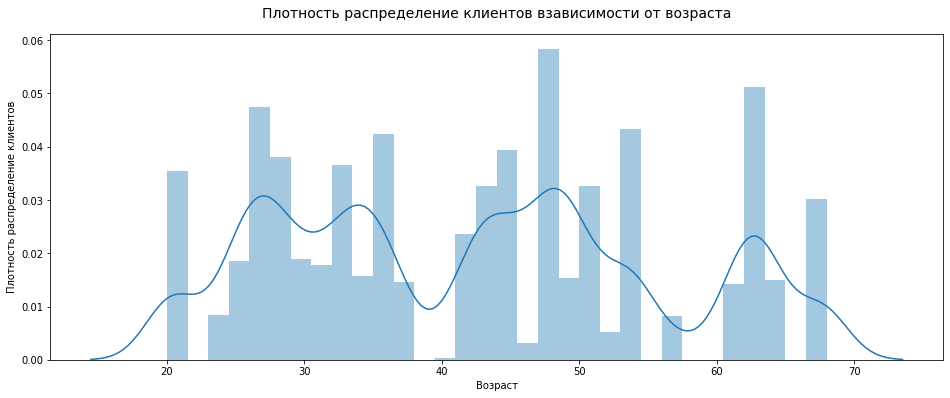

In [61]:
plt.figure(figsize=(16, 6)) # зададим размер графика
displot_dob_years= sns.distplot(data.loc[data['dob_years'], 'dob_years']) # определим какие данные мы читаем для построения графика
displot_dob_years.set_title('Плотность распределение клиентов взависимости от возраста', fontdict={'fontsize':14}, pad=16) # напишем заголовок графика
displot_dob_years.set_ylabel('Плотность распределение клиентов') # подпишем ось ординат
displot_dob_years.set_xlabel("Возраст") # подпишем ось абцисс

Для уточнение категорий воспользуемся методом `pandas.qcut` для деление столбца `'dob_years'` на 6 равных:

In [62]:
pd.qcut(data['dob_years'], 6) # делим столбец dob_years на 6 частей

0        (37.0, 42.0]
1        (30.0, 37.0]
2        (30.0, 37.0]
3        (30.0, 37.0]
4        (50.0, 57.0]
             ...     
21448    (42.0, 50.0]
21449    (57.0, 75.0]
21450    (37.0, 42.0]
21451    (37.0, 42.0]
21452    (37.0, 42.0]
Name: dob_years, Length: 21453, dtype: category
Categories (6, interval[float64]): [(18.999, 30.0] < (30.0, 37.0] < (37.0, 42.0] < (42.0, 50.0] <
                                    (50.0, 57.0] < (57.0, 75.0]]

По графику наблюдаем два спада по возрастам клинетов в районе 40 лет, а также в районе 60 лет.  
Исходя из графика, а также деления методом `.qcut`, можно выделать следующие основные категории по уровню дохода:
* до 30 лет;
* от 30 до 37 лет;
* от 37 до 42 лет;
* от 42 до 50 лет;
* от 50 до 57 лет;
* свыше 57 лет.

In [63]:
def dob_years_group(dob_years): # определим функцию dob_years_group
# используем оператор условия для разделение клиентов по уровню дохода
    if dob_years <= 30 :
        return 'до 30 лет'
    if ((dob_years > 30) and (dob_years <= 37)):
        return 'от 30 до 37 лет'
    if ((dob_years > 37) and (dob_years <= 42)):
        return 'от 37 до 42 лет'
    if ((dob_years > 42) and (dob_years <= 50)):
        return 'от 42 до 50 лет'  
    if ((dob_years > 50) and (dob_years <= 57)):
        return 'от 50 до 57 лет'     
    return 'свыше 57 лет' 

Запишем новый столбец `'dob_years_group'` используя функцию dob_years_group:

In [64]:
data['dob_years_group'] = data['dob_years'].apply(dob_years_group) # создаем новые столбец

Посмотрим уникальные значение нового столбца:

In [65]:
data['dob_years_group'].value_counts() # вызовем метод для определение количества уникальных значений

от 42 до 50 лет    4059
от 30 до 37 лет    3956
до 30 лет          3717
свыше 57 лет       3397
от 50 до 57 лет    3247
от 37 до 42 лет    3077
Name: dob_years_group, dtype: int64

#### **Вывод**

Выведем 5 строк обновленной таблицы:

In [66]:
data.head()

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,lemma,purpose_group,children_group,total_income_group,debt_group,dob_years_group
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",жилищный кредит,один ребенок,свыше 230 тыс.,returned_on_time,от 37 до 42 лет
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автокредит,один ребенок,от 95 тыс. до 125 тыс.,returned_on_time,от 30 до 37 лет
2,0,33,среднее,женат / замужем,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",жилищный кредит,без детей,от 145 тыс. до 170 тыс.,returned_on_time,от 30 до 37 лет
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",кредит на образование,многодетные,свыше 230 тыс.,returned_on_time,от 30 до 37 лет
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",кредит на свадьбу,без детей,от 145 тыс. до 170 тыс.,returned_on_time,от 50 до 57 лет


Провели категоризацию по столбцам: `'children'`, `'total_income'`, `'purpose'`, `'debt'`, с создаем новых столбцов с припиской `'..._group'`.  

При определении категорий уровня дохода, построили график, на котором видны большое количество значения для уровня дохода в пределах с 140 тыс. до 150 тыс. Данное обстоятельство требуется изучение.

## Ответы на вопросы цели исследования

Для ответа на поставленные вопросы мы воспользуемся инструментом -  свободная таблица.  
Для этого определим функцию `'pivot_repayment_credit'` для построения сводной таблицы, и расчета процента возврата кредита в срок для требуемой категории:

In [67]:
# определяем функцию pivot_repayment_credit c аргументом group
def pivot_repayment_credit(group):
# Определим переменную data_children_pivot в которую запишем сводоную таблицу,
# используя в качестве аргументов, для:
# index — столбец или столбцы, по которым группируют данные
# columns — столбец, по значениям которого происходит группировка (debt_group)
# values — значения, по которым мы хотим увидеть сводную таблицу (debt)
# aggfunc — функция, применяемая к значениям (count)
  
  data_pivot = data.pivot_table(index=[group], columns='debt_group', values='debt', aggfunc='count')
  # удалим пропуски данных, если клиент не имел просрочки по кредиты
  data_pivot['didnt_returned_on_time'] = data_pivot['didnt_returned_on_time'].fillna(0)
  # удалим пропуски данных, если клиент всегда возвращал кредит не в срок
  data_pivot['returned_on_time'] = data_pivot['returned_on_time'].fillna(0)
  # объявим переменную data_pivot в которую запишем отношение количества клиентов, которые не имели задолженности к общему числу для данной категории
  data_pivot['repayment_credit'] = data_pivot['returned_on_time'] / (data_pivot['didnt_returned_on_time'] + data_pivot['returned_on_time'])
  # для определения процентов умножим на 100 и округлим значения до сотых
  data_pivot['repayment_credit'] = round(data_pivot['repayment_credit'] * 100, 2)
  # выведем свободную таблицу, с сортировкой по столбцу repayment_credit в порядке возрастания
  return data_pivot.sort_values(by = 'repayment_credit', ascending=False)

#### Зависимость между наличием детей и возвратом кредита в срок

Для определения зависимости между наличием детей и возвратом кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее столбец `'children_group'` для построения сводной таблицы: 

In [68]:
pivot_repayment_credit('children_group') # вызываем функцию pivot_repayment_credit с аргументом 'children_group'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
children_group,,,
без детей,1063,13027,92.46
один ребенок,445,4410,90.83
многодетные,233,2275,90.71


**Вывод**

Клиенты у которых нет детей, кредит возвращают чаще (`92,46 %` возврата в срок), так и  семьи с одним ребенком возвращают кредит чаще (`90,83 %` возврата в срок), чем многодетные (`90,71 %` возврата в срок).

#### Зависимость между семейным положением и возвратом кредита в срок

Для определения зависимоти между семейным положением и возвратом кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'family_status'` для построения сводной таблицы: 

In [69]:
pivot_repayment_credit('family_status') # вызываем функцию pivot_repayment_credit с аргументом 'family_status'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
family_status,,,
вдовец / вдова,63,896,93.43
в разводе,85,1110,92.89
женат / замужем,931,11408,92.45
гражданский брак,388,3762,90.65
не женат / не замужем,274,2536,90.25


**Вывод**

Наиболее платежеспободные категории клиентов: 
* `вдовец / вдова` - процент возврат кредитов `93,43 %`; 
* `в разводе` - процент возврат кредитов `92,89 %`;
* `женат / замужем` - процент возврат кредитов `92,45 %`.  
  

При этом клиенты находящийся в `гражданском браке` и `не женат / не замужем` менее платежеспособные, и имеют процент возврата `90,65 %` и `90.25 %`.

####Зависимость между уровнем дохода и возвратом кредита в срок

Для определения зависимости между уровнем дохода и возвратом кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'total_income_group'` для построения сводной таблицы: 

In [70]:
pivot_repayment_credit('total_income_group') # вызываем функцию pivot_repayment_credit с аргументом 'total_income_group'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
total_income_group,,,
свыше 230 тыс.,243,3272,93.09
меньше 95 тыс.,312,3579,91.98
от 170 тыс. до 230 тыс.,304,3397,91.79
от 125 тыс. до 145 тыс.,196,2109,91.50
от 95 тыс. до 125 тыс.,296,3182,91.49
от 145 тыс. до 170 тыс.,390,4173,91.45


**Вывод**

Наиболее платежеспособные клиенты, у которых доход:
* свыше 230 тыс. – процент возврат кредитов `93,09 %`;

Клиенты с остальным доходом, примерно на одном уровне по возврату кредита:
* меньше 95 тыс. – процент возврат кредитов `91,98 %`;
* от 170 тыс. до 230 тыс. – процент возврат кредитов `91,79 %`;
* от 125 тыс. до 145 тыс. – процент возврат кредитов `91,50 %`;
* от 95 тыс. до 125 тыс. – процент возврат кредитов `91,50 %`;
* от 145 тыс. до 170 тыс. – процент возврат кредитов `91,45 %`.

#### Влияние разных целей кредита на его возврат в срок

Для определения влияния разных целей кредита на его возврат в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'purpose_group'` для построения сводной таблицы: 

In [71]:
pivot_repayment_credit('purpose_group') # вызываем функцию pivot_repayment_credit с аргументом 'purpose_group'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
purpose_group,,,
жилищный кредит,782,10029,92.77
кредит на свадьбу,186,2137,91.99
кредит на образование,370,3643,90.78
автокредит,403,3903,90.64


**Вывод**

Наиболее платежеспособные клиенты, взависимости от целей кредита:
* клиенты берущие кредит в категории: жилищный кредит – процент возврат кредитов `92,77 %`;
* кредит на свадьбу – процент возврат кредитов `91,99 %`;

Более критичные с точки зрения возврата кредита:
* кредит на образование	 – процент возврат кредитов `90,78 %`;
* автокредит – процент возврат кредитов `90,64 %`.


#### Влияние пола клиента на возврат кредита в срок

Для определения влияния полка клиента на возврат кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'gender'` для построения сводной таблицы: 

In [72]:
pivot_repayment_credit('gender') # вызываем функцию pivot_repayment_credit с аргументом 'gender'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
gender,,,
F,994,13179,92.99
M,747,6533,89.74


**Вывод**

Клиенты женщины возвращают кредит чаще, чем клиенты мужчины. `92,99 %` возвратов срок против `89,74 %` соответсвенно.

#### Влияние возраста клиента на возврат кредита в срок

Для определения влияния полка клиента на возврат кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'dob_years_group'` для построения сводной таблицы: 


In [73]:
pivot_repayment_credit('dob_years_group') # вызываем функцию pivot_repayment_credit с аргументом 'dob_years_group'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
dob_years_group,,,
свыше 57 лет,177,3220,94.79
от 50 до 57 лет,204,3043,93.72
от 42 до 50 лет,312,3747,92.31
от 37 до 42 лет,255,2822,91.71
от 30 до 37 лет,390,3566,90.14
до 30 лет,403,3314,89.16


Вывод

Чем старше клиент, тем больше вероятность возврата его кредита в срок.

#### Влияние уровня образования клиента на возврат кредита в срок

Для определения влияния полка клиента на возврат кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'education'` для построения сводной таблицы: 

In [74]:
pivot_repayment_credit('education') # вызываем функцию pivot_repayment_credit с аргументом 'education'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
education,,,
ученая степень,0.0,6.0,100.00
высшее,278.0,4972.0,94.70
среднее,1364.0,13807.0,91.01
неоконченное высшее,68.0,676.0,90.86
начальное,31.0,251.0,89.01


Вывод

Чем выше уровень образования, тем больше вероятность, что клиент вернет кредит в срок.

#### Влияние категории занятости клиента на возврат кредита в срок

Для определения влияния полка клиента на возврат кредита в срок, мы воспользуемся функцией `pivot_repayment_credit` задав на нее наименование столбца `'income_type'` для построения сводной таблицы: 

In [75]:
pivot_repayment_credit('income_type') # вызываем функцию pivot_repayment_credit с аргументом 'income_type'

debt_group,didnt_returned_on_time,returned_on_time,repayment_credit
income_type,,,
предприниматель,0.0,2.0,100.00
студент,0.0,1.0,100.00
пенсионер,216.0,3613.0,94.36
госслужащий,86.0,1371.0,94.10
компаньон,376.0,4702.0,92.60
сотрудник,1061.0,10022.0,90.43
безработный,1.0,1.0,50.00
в декрете,1.0,0.0,0.00


Вывод

Категории `предприиматель`, `студент`, `безработный` и в `декрете` ввиду малого количества клиентов мы рассматривать не можем.  
Оставшиеся категории, наиболее низкий риск по возврату кредита у категорий `пенсионер` и `госслужащий`.

## Итоги исследования

В ходе исследования были получены ответы на вопросы:

* Клиенты не имеющие детей возвращают кредит в срок, чаще, чем клиенты с детьми.
* Клиенты вдовцы, в разводе, а также женатые, возвращают кредит чаще, чем клиенты находящиеся в гражданском браке, не женатые клиенты.
* Клиенты имеющие доход свыше 230 тыс. возвращают кредит в срок, чаще чем остальные клиенты.
* Клиенты берущие кредит на жилищные нужды, возвращают его чаще, чем по остальных категориям кредитов.
* Клиенты женщины возвращию кредиты чаще, чем клиенты мужчины.
* Клиенты за 50 лет возвращают кредиты, чаще, чем клиенты кому меньше 50 лет.
* Клиенты с высшим образование возвращают кредиты чаще, чем без образование или со средним.
* Клиенты пенсионеры и госслужащие возвращают кредиты чаще других категорий.

Таким образом можно составить портрет наиболее привлекательного, с точки зрения возврата кредита, клиента:
* Женщина за 50 лет, не имеющая детей, в разводе или вдова, с доходом свыше 230 тыс., которая взяла кредит на жилищные нужды, с высшим образованием, пенсионерка или госслужащая.

Клиент наименее привлектаельный, с точки зрения возврата кредита:
* Мужчина до 30 лет, находящийся в гражданском брак или не женат, имеющий средний доход, с целью получения автокредита или кредита на образование, получивший образование ниже среднего, являющийся сотрудником.